In [3]:
import os
import sys
sys.path.append(os.path.dirname(os.path.realpath(os.getcwd())))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel, cmdstan_path
import pickle
import json
from sklearn.preprocessing import PowerTransformer, StandardScaler
import arviz as az
import pystan

In [19]:
y_data_raw = pd.read_csv("../data/y_count_original.csv")
y_data_raw.drop(columns=["age"], inplace=True)
y_data_raw

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,...,s90,s91,s92,s93,s94,s95,s96,s97,s98,s99
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,11.0,NaN,NaN,NaN,NaN,NaN,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,113.0,21.0,54.0,80.0,NaN,NaN,54.0,14.0,20.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,33.0,56.0,13.0,15.0,40.0,NaN,81.0,32.0,50.0,4.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.0,11.0,NaN,20.0,NaN,30.0,57.0,80.0,33.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,69.0,71.0,NaN,69.0,22.0,NaN,41.0,43.0,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.0,53.0,NaN,100.0,NaN,NaN,NaN,3.0,NaN,12.0
6,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,...,97.0,38.0,NaN,61.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,12.0,NaN,NaN,37.0,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,57.0,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,3.0,3.0,NaN,6.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,52.0,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
np.max(y_data_raw.values.flatten()[~np.isnan(y_data_raw.values.flatten())])

312.0

In [14]:
# DDH, FF + PCC, PKM, PKG, FFG
ship_column_index = [(1, 7), (8, 33), (34, 76), (77, 95), (96, 99)]
engine_types = {
    1 : "MTU 20V 956 TB92",
    2 : "GE LM2500",
    3 : "MTU 20V 538 TU90",
    4 : "MTU 16V 1163 TB93"
}
ship_full_displacement = [5520, 3100, 170, 570, 3300]
ship_engine_type = [1, 2, 3, 4, 2]
ship_service_year = [2003, 1988, 1993, 2008, 2013]
propulsion_system = ["CODOG", "CODOG", "CODAD", "CODAG", "CODOG"]

In [15]:
y_data_raw = y_data_raw.loc[:, ((~y_data_raw.isnull()).sum(axis=0) >= 4)]

In [17]:
y_data_raw.columns

Index(['s1', 's2', 's3', 's5', 's8', 's9', 's11', 's12', 's13', 's15', 's17',
       's18', 's19', 's20', 's21', 's22', 's23', 's24', 's25', 's26', 's27',
       's28', 's29', 's30', 's31', 's32', 's33', 's34', 's35', 's36', 's37',
       's38', 's39', 's40', 's41', 's42', 's43', 's44', 's45', 's46', 's47',
       's48', 's49', 's50', 's51', 's52', 's53', 's54', 's55', 's56', 's57',
       's58', 's59', 's61', 's62', 's63', 's64', 's65', 's66', 's67', 's68',
       's69', 's70', 's71', 's72', 's77', 's78', 's79', 's80', 's81', 's82',
       's83', 's84', 's85', 's86', 's87', 's89', 's90', 's91', 's93', 's97',
       's99'],
      dtype='object')

## 1. Conceptial Analysis

### Basic terms: 

MTTF(Mean Time To Failure): the average amount of time a non-repairable asset operates before it fails

MTTF = (total number of hours of operations) / (number of non-repairable components in system)

MTBF(Mean Time Between Failure): The average time(hours) between system breakdowns

MTBF = (number of operational hours) / (number of failures)

### Good references:

http://www.reliabilityanalytics.com/blog/2011/08/31/poisson-distribution/

"bathtub curve"

Poisson Regression: rate $\lambda$ = $(length\ of\ time) \times (failure\ rate)$

length of  time would be in years

failure rate = $\lambda$

$MTBF = \frac{1}{\lambda}$

## Example Features

1. ship relative displacement($\frac{shipsize_i}{\textrm{min}(shipsize)}$)
2. oldest ship age within class. per-ship age is not available
3. propulsion method(CODOG, CODAG, etc)
4. number of diesel engines
5. diesel engine horsepower
6. effective power/weight ratio ($\frac{combined\_diesel\_HP}{displacement}$)
7. relative complexity(CODAD: 1, CODOG: 1.2, CODAG: 1.5). Values set at my discretion.
8. min-max scaled age $\frac{age - 1}{31 - 1}$, results in domain [0, 1]

### Assumptions

assumed failure count proportion based on propulsion system(my hypothesis):
CODAG > CODOG > CODAD

the older the ship, the more failure counts(may not be true. see bathtub curve)

engine size is proportional to ship size, hence larger engine means more complex system

propulsion system complexity - the more propulsion subsystems an engine has, the more prone it is to failures

### Example Model

$\lambda = earlyfailures + random failures + wearout$

early failures: related with engine type and complexity, exponentially decaying over age

random failures: unmeasurable, but believed to be proportional to complexity, deemed constant over age

wearout: ship age, operation uptime, complexity, exponentially increasing over age

## 2. Observational Space

For each ship $ship_i$ where $i = 1,2,3,...,99$, and $age = 1,2,3,...,31$ failure count $y_{i, age}$ is the failure count of $ship_i$ at its age since commision $age$

## 3. Construct Summary Statistic

skipping for now

## 4. Model Development


\begin{aligned}
y \sim \textrm{poisson}(\lambda_{ship,age})
\newline
\lambda_{ship, age} = early_{ship, age} \times \textrm{failure_form}(age) + wear_{ship, age} \times \textrm{failure_form}(-age + 1) + \eta, \, \lambda \in [0, \infty)
\newline
early_{ship, age} = complexity_{ship}  \times \alpha_{engine} + \beta \ \textrm{ln} \ relative\_displacement
\newline
wear_{ship, age} = complexity_{ship} \times engine\_count \times \gamma + \delta \ \textrm{ln} \ relative\_displacement
\newline
\textrm{failure_form}(age) = \frac{\phi^{\textrm{exp}(age)} - 1}{\phi - 1}
\newline
\phi \sim \textrm{normal}(3, 1.5), \, \phi \in [1, \infty)
\newline
\alpha \sim \textrm{normal}(3, 5), \, \alpha \in [0, \infty)
\newline
\beta \sim \textrm{normal}(3, 5), \, \beta \in [0, \infty)
\newline
\gamma \sim \textrm{normal}(3, 5), \, \gamma \in [0, \infty)
\newline
\delta \sim \textrm{normal}(3, 5), \, \delta \in [0, \infty)
\newline
\eta \sim \textrm{normal}(5, 1)
\end{aligned}



## 5. Construct Summary Function

## 6. Simulate Bayesian Ensemble

In [146]:
simu_ensemble_file = os.path.join("./models", "simu_bayesian_ensemble.stan")
simu_ensemble_model = pystan.StanModel(file=simu_ensemble_file)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_3fc05e964b5285f18a803787daada2c1 NOW.


In [182]:
R = 1000
N = 1000
simu_age = 0.9
simu_relative_displacement = 13
simu_complexity = 1.2
simu_engine_count = 2
simu_data = {
    "N" : N,
    "age" : simu_age,
    "relative_displacement" : simu_relative_displacement,
    "complexity": simu_complexity,
    "engine_count" : simu_engine_count,
}
simu_ensemble_fit = simu_ensemble_model.sampling(iter=R, algorithm="Fixed_param", chains=1, data=simu_data)

In [183]:
simu_lambdas = simu_ensemble_fit.extract(pars=["lambda"])["lambda"]
simu_ys = simu_ensemble_fit.extract(pars=["y"])["y"]

In [184]:
np.mean(simu_lambdas[~np.isnan(simu_lambdas)])

21.044830749647826

## 7. Prior Checks

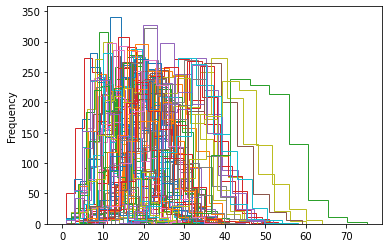

In [185]:
ax = plt.gca()
for x in range(100):
    pd.Series(simu_ys[x]).plot.hist(ax=ax, histtype="step")

## 8. Configure Algorithm

use default settings

## 9. Fit Simulated Ensemble

In [153]:
fit_model_file = os.path.join("./models", "fit_data.stan")
fit_model = pystan.StanModel(fit_model_file)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_285f153830c312f4747d5bee0a37cca2 NOW.


In [186]:
post_lambda_zscore = []
post_lambda_contraction = []
prior_lambda_std = np.std(simu_lambdas, ddof=1)
prior_lambda_mean = np.mean(simu_lambdas)
for x in range(50):
    if np.any(np.isnan(simu_ys[x])): 
        print("skip", x)
        continue
    fit_model_data = {
        "N" : N,
        "y" : simu_ys[x].astype(np.int32),
        "complexity" : simu_complexity,
        "age" : simu_age,
        "engine_count" : simu_engine_count,
        "relative_displacement" : simu_relative_displacement,
    }
    fit_model_fit = fit_model.sampling(data=fit_model_data, chains=2, iter=1000)
    fit_lambda_summary = fit_model_fit.summary(pars="lambda")["summary"][0]
    post_lambda_mean = fit_lambda_summary[0]
    post_lambda_std = fit_lambda_summary[2]
    post_lambda_zscore.append((post_lambda_mean - simu_lambdas[x]) / prior_lambda_mean)
    post_lambda_contraction.append(1 - (post_lambda_std / prior_lambda_std) ** 2)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run a

skip 21


To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)


skip 38


To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)


skip 41


To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)


## 10. Algorithmic Calibration

skipping, since per-fit diagnostic information are seen in step 9.

## 11. Inferential Calibration

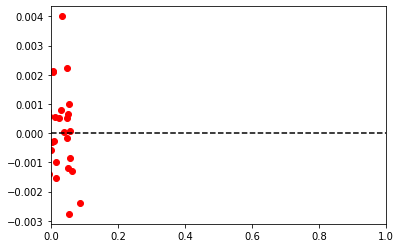

In [187]:
ax = plt.gca()
ax.set_xlim(0, 1)
ax.axhline(0, linestyle="--", c="black")
ax.scatter(post_y_contraction, post_y_zscore, c="r")